# Simulating a Real-World Phenomenon - Irish Discrimination Rates

Explain

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline


In [2]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
T = int(round(T / 0.12))
print("Estimated Total Survey Size: ", T)


M_R = (M/T)*100
F_R = (F/T)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  4.449781042520129
Percentage of Females who felt discriminated against:  7.550501483260348


## Sex

In [3]:
# Set Array
sex_x = ['Male', 'Female']


# Build Dataframe - Assume 50% Males and Females
sex = np.random.choice(sex_x, T, p=[0.5, 0.5])

df=pd.DataFrame(data={'Sex': sex})


print(df)

          Sex
0      Female
1      Female
2      Female
3      Female
4        Male
5      Female
6        Male
7        Male
8      Female
9      Female
10     Female
11       Male
12       Male
13     Female
14       Male
15       Male
16     Female
17     Female
18     Female
19       Male
20       Male
21       Male
22       Male
23       Male
24       Male
25     Female
26     Female
27     Female
28     Female
29     Female
...       ...
14128  Female
14129  Female
14130    Male
14131  Female
14132    Male
14133  Female
14134    Male
14135  Female
14136    Male
14137    Male
14138    Male
14139  Female
14140    Male
14141  Female
14142  Female
14143    Male
14144  Female
14145  Female
14146    Male
14147  Female
14148  Female
14149    Male
14150    Male
14151  Female
14152  Female
14153  Female
14154    Male
14155  Female
14156    Male
14157  Female

[14158 rows x 1 columns]


## Experienced Discrimination

In [4]:
# Set Array
disc_xm = ['M_Y', 'M_N']
disc_xf = ['F_Y', 'F_N']

M_Y = M
F_Y = F

# Assume 50% Males and 50% Females
hlf_T = T /2

M_N = hlf_T - M_Y
F_N = hlf_T - F_Y

M_T = M_Y + M_N
F_T = F_Y + F_N

M_Y = M_Y/M_T
M_N = M_N/M_T
F_Y = F_Y/F_T
F_N = F_N/F_T

# Male
disc_yes_m =  df['Sex']=='Male'
df_m = df[disc_yes_m]

# Female
disc_yes_f =  df['Sex']=='Female'
df_f = df[disc_yes_f]


# Male
yes_count_xm = df_m['Sex']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_f['Sex']
yes_count_f = yes_count_xf.count()

# Build Dataframe
disc_m = np.random.choice(disc_xm, yes_count_m, p=[M_Y, M_N])
disc_f = np.random.choice(disc_xf, yes_count_f, p=[F_Y, F_N])


# Set Type Column
df_m['Discriminated Against'] = disc_m
df_f['Discriminated Against'] = disc_f


# Join Dataframes
frames_a = [df_m, df_f]

df = pd.concat(frames_a)

# Sort by index
df.sort_index(inplace=True)


df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df)

          Sex Discriminated Against
0      Female                   Yes
1      Female                    No
2      Female                    No
3      Female                    No
4        Male                    No
5      Female                    No
6        Male                    No
7        Male                    No
8      Female                    No
9      Female                   Yes
10     Female                    No
11       Male                    No
12       Male                    No
13     Female                    No
14       Male                    No
15       Male                    No
16     Female                    No
17     Female                    No
18     Female                    No
19       Male                    No
20       Male                   Yes
21       Male                    No
22       Male                    No
23       Male                    No
24       Male                    No
25     Female                    No
26     Female               

## Discrimination Type

In [5]:
# Set Array
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']

# Males

# Set Discrimination Types %
gen_m = 9
mar_m = 3
fam_m = 9
age_m = 24
dis_m = 6
rac_m = 21
oth_m = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_m = gen_m + mar_m + fam_m + age_m + dis_m +  rac_m + oth_m

gen_m = gen_m/tot_disc_m
mar_m = mar_m/tot_disc_m
fam_m = fam_m/tot_disc_m
age_m = age_m/tot_disc_m
dis_m = dis_m/tot_disc_m
rac_m = rac_m/tot_disc_m
oth_m = oth_m/tot_disc_m

# Females

# Set Discrimination Types %
gen_f = 14 
mar_f = 5
fam_f = 14
age_f = 24
dis_f = 6
rac_f = 17
oth_f = 36

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_f = gen_f + mar_f + fam_f + age_f + dis_f +  rac_f + oth_f

gen_f = gen_f/tot_disc_f
mar_f = mar_f/tot_disc_f
fam_f = fam_f/tot_disc_f
age_f = age_f/tot_disc_f
dis_f = dis_f/tot_disc_f
rac_f = rac_f/tot_disc_f
oth_f = oth_f/tot_disc_f

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

# Male
disc_yes_m =  df_yes['Sex']=='Male'
df_yes_m = df_yes[disc_yes_m]

# Female
disc_yes_f =  df_yes['Sex']=='Female'
df_yes_f = df_yes[disc_yes_f]


disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes

# Male
yes_count_xm = df_yes_m['Discriminated Against']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_yes_f['Discriminated Against']
yes_count_f = yes_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_m = np.random.choice(discrim_type, yes_count_m, p=[gen_m, mar_m, fam_m, age_m, dis_m, rac_m, oth_m])

# Female
type_disc_f = np.random.choice(discrim_type, yes_count_f, p=[gen_f, mar_f, fam_f, age_f, dis_f, rac_f, oth_f])

# Set Type Column
df_no['Type'] = 'NA'
df_yes_m['Type'] = type_disc_m
df_yes_f['Type'] = type_disc_f


# Join Dataframes
frames_a = [df_yes_m, df_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

          Sex Discriminated Against           Type
0      Female                   Yes         Gender
1      Female                    No             NA
2      Female                    No             NA
3      Female                    No             NA
4        Male                    No             NA
5      Female                    No             NA
6        Male                    No             NA
7        Male                    No             NA
8      Female                    No             NA
9      Female                   Yes            Age
10     Female                    No             NA
11       Male                    No             NA
12       Male                    No             NA
13     Female                    No             NA
14       Male                    No             NA
15       Male                    No             NA
16     Female                    No             NA
17     Female                    No             NA
18     Female                  

## Social Setting

In [6]:
# Set Array
discrim_set = ['Workplace', 'Looking for Work', 'Public Place', 'Banks', 'Education', 'Obtaining Housing', 'Accessing health services', 'Using transport services', 'Accessing public services']

# Note there is no clear connection detailed between social setting and discrimination type, therefor random

# Males

# Set Discrimination Setting %
wrk_m = 26
lrk_m = 31
pub_m = 17
ban_m = 16
edu_m = 4
hou_m = 10
hea_m = 11
tra_m = 4
ser_m = 10

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_m = wrk_m + lrk_m + pub_m + ban_m + edu_m + hou_m + hea_m + tra_m + ser_m

wrk_m = wrk_m/tot_disc_set_m
lrk_m = lrk_m/tot_disc_set_m
pub_m = pub_m/tot_disc_set_m
ban_m = ban_m/tot_disc_set_m
edu_m = edu_m/tot_disc_set_m
hou_m = hou_m/tot_disc_set_m
hea_m = hea_m/tot_disc_set_m
tra_m = tra_m/tot_disc_set_m
ser_m = ser_m/tot_disc_set_m

# Females

# Set Discrimination Setting %
wrk_f = 31
lrk_f = 22
pub_f = 19
ban_f = 16
edu_f = 5
hou_f = 11
hea_f = 15
tra_f = 5
ser_f = 7

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_f = wrk_f + lrk_f + pub_f + ban_f + edu_f + hou_f + hea_f + tra_f + ser_f

wrk_f = wrk_f/tot_disc_set_f
lrk_f = lrk_f/tot_disc_set_f
pub_f = pub_f/tot_disc_set_f
ban_f = ban_f/tot_disc_set_f
edu_f = edu_f/tot_disc_set_f
hou_f = hou_f/tot_disc_set_f
hea_f = hea_f/tot_disc_set_f
tra_f = tra_f/tot_disc_set_f
ser_f = ser_f/tot_disc_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_set_m = np.random.choice(discrim_set, yes_set_count_m, p=[wrk_m, lrk_m ,pub_m ,ban_m ,edu_m ,hou_m, hea_m, tra_m, ser_m])

# Female
type_disc_set_f = np.random.choice(discrim_set, yes_set_count_f, p=[wrk_f, lrk_f ,pub_f ,ban_f ,edu_f ,hou_f, hea_f, tra_f, ser_f])

# Set Type Column
df_set_no['Social Setting'] = 'NA'
df_set_yes_m['Social Setting'] = type_disc_set_m
df_set_yes_f['Social Setting'] = type_disc_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

          Sex Discriminated Against           Type             Social Setting
0      Female                   Yes         Gender                      Banks
1      Female                    No             NA                         NA
2      Female                    No             NA                         NA
3      Female                    No             NA                         NA
4        Male                    No             NA                         NA
5      Female                    No             NA                         NA
6        Male                    No             NA                         NA
7        Male                    No             NA                         NA
8      Female                    No             NA                         NA
9      Female                   Yes            Age   Using transport services
10     Female                    No             NA                         NA
11       Male                    No             NA              

## Action Taken

In [7]:
# Set Array
action_set = ['Verbal', 'Written', 'Offical / Legal', 'No Action']

# Note there is no clear connection detailed between Action Taken to social setting and discrimination type, therefore random

# Males

# Set Discrimination Setting %
ver_m = 23
wri_m = 7
off_m = 10
noa_m = 65

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_m = ver_m + wri_m + off_m + noa_m

ver_m = ver_m/tot_act_set_m
wri_m = wri_m/tot_act_set_m
off_m = off_m/tot_act_set_m
noa_m = noa_m/tot_act_set_m


# Females

# Set Discrimination Setting %
ver_f = 27
wri_f = 9
off_f = 9
noa_f = 63

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_f = ver_f + wri_f + off_f + noa_f

ver_f = ver_f/tot_act_set_f
wri_f = wri_f/tot_act_set_f
off_f = off_f/tot_act_set_f
noa_f = noa_f/tot_act_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_act_set_m = np.random.choice(action_set, yes_set_count_m, p=[ver_m, wri_m, off_m, noa_m])

# Female
type_act_set_f = np.random.choice(action_set, yes_set_count_f, p=[ver_f, wri_f, off_f, noa_f])

# Set Action Column
df_set_no['Type Action Taken'] = 'NA'
df_set_yes_m['Type Action Taken'] = type_act_set_m
df_set_yes_f['Type Action Taken'] = type_act_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)

# Add Action Y/N Column
df['Action Taken'] = df['Type Action Taken']
df ['Action Taken'].replace({'Verbal':'Yes', 'Written':'Yes', 'Offical / Legal':'Yes', 'No Action':'No'}, inplace=True)

print(df)

          Sex Discriminated Against           Type             Social Setting  \
0      Female                   Yes         Gender                      Banks   
1      Female                    No             NA                         NA   
2      Female                    No             NA                         NA   
3      Female                    No             NA                         NA   
4        Male                    No             NA                         NA   
5      Female                    No             NA                         NA   
6        Male                    No             NA                         NA   
7        Male                    No             NA                         NA   
8      Female                    No             NA                         NA   
9      Female                   Yes            Age   Using transport services   
10     Female                    No             NA                         NA   
11       Male               

## Sort Columns

In [8]:
df = df[["Sex","Discriminated Against","Type","Social Setting","Action Taken","Type Action Taken"]]
print(df)

          Sex Discriminated Against           Type             Social Setting  \
0      Female                   Yes         Gender                      Banks   
1      Female                    No             NA                         NA   
2      Female                    No             NA                         NA   
3      Female                    No             NA                         NA   
4        Male                    No             NA                         NA   
5      Female                    No             NA                         NA   
6        Male                    No             NA                         NA   
7        Male                    No             NA                         NA   
8      Female                    No             NA                         NA   
9      Female                   Yes            Age   Using transport services   
10     Female                    No             NA                         NA   
11       Male               

## Plot

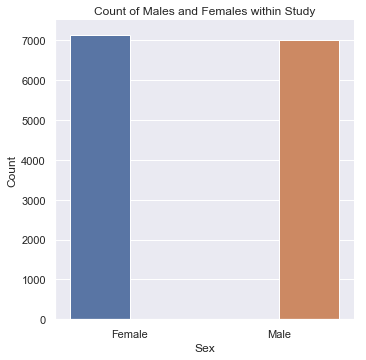

In [10]:
mf = sns.catplot(x="Sex", hue="Sex", kind="count", data=df)
mf.set(ylabel="Count")
mf.set(title="Count of Males and Females within Study")
plt.show()

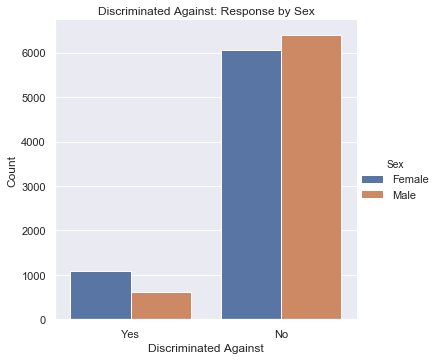

In [11]:
yn = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df)
yn.set(ylabel="Count")
yn.set(title="Discriminated Against: Response by Sex")
plt.show()

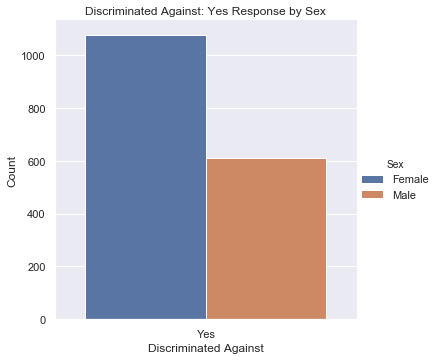

In [12]:
df_yes =  df['Discriminated Against']=='Yes'
df.yes = df[df_yes]

y = sns.catplot(x="Discriminated Against", hue="Sex", kind="count", data=df.yes)
y.set(ylabel="Count")
y.set(title="Discriminated Against: Yes Response by Sex")
plt.show()

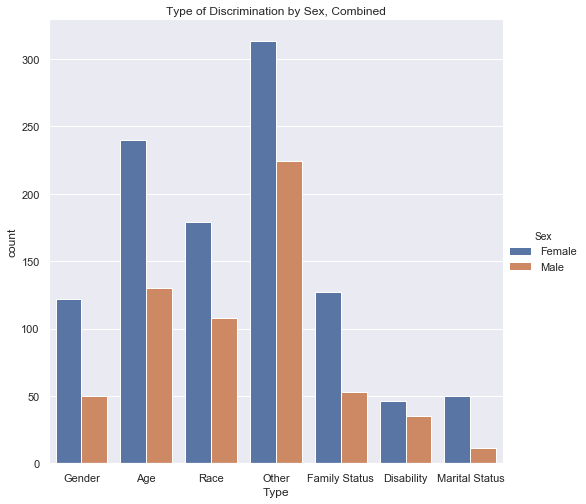

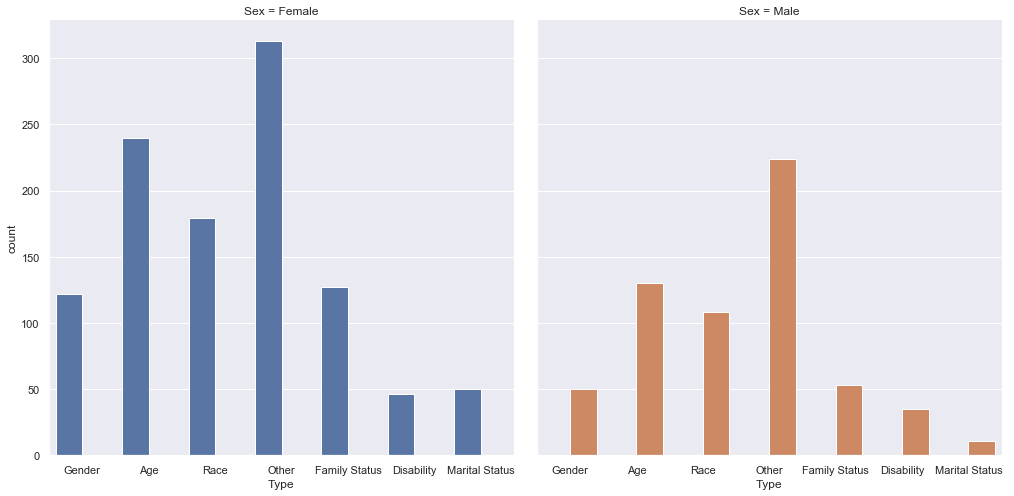

In [13]:
v = sns.catplot(x="Type", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type of Discrimination by Sex, Combined")
g = sns.catplot(x="Type", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

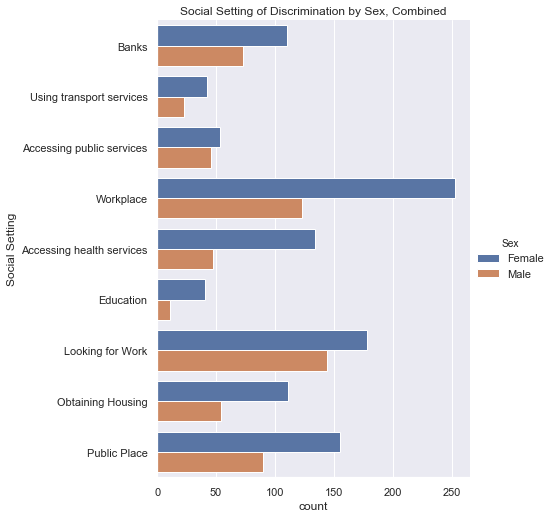

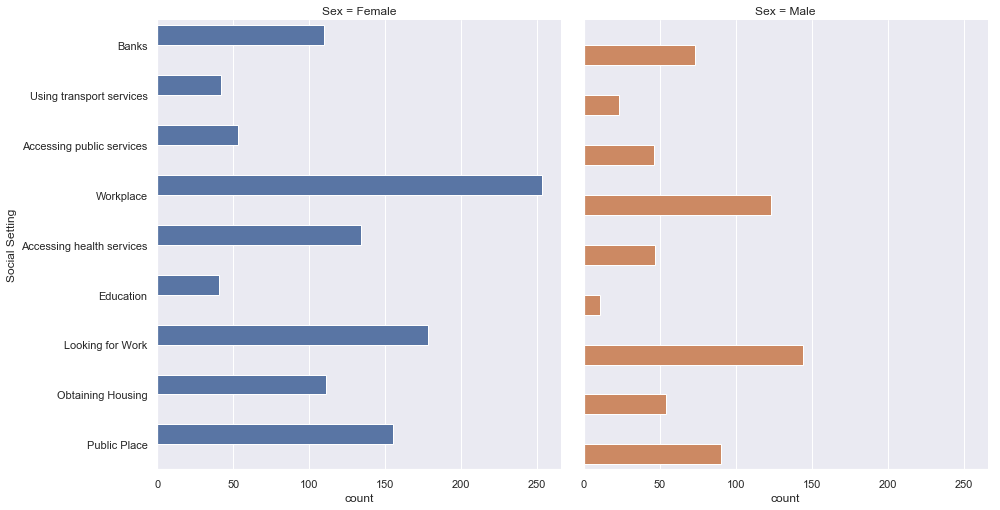

In [16]:
v = sns.catplot(y="Social Setting", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Social Setting of Discrimination by Sex, Combined")
g = sns.catplot(y="Social Setting", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

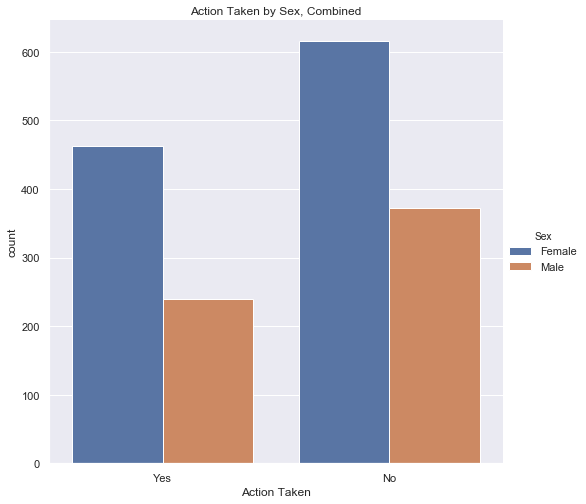

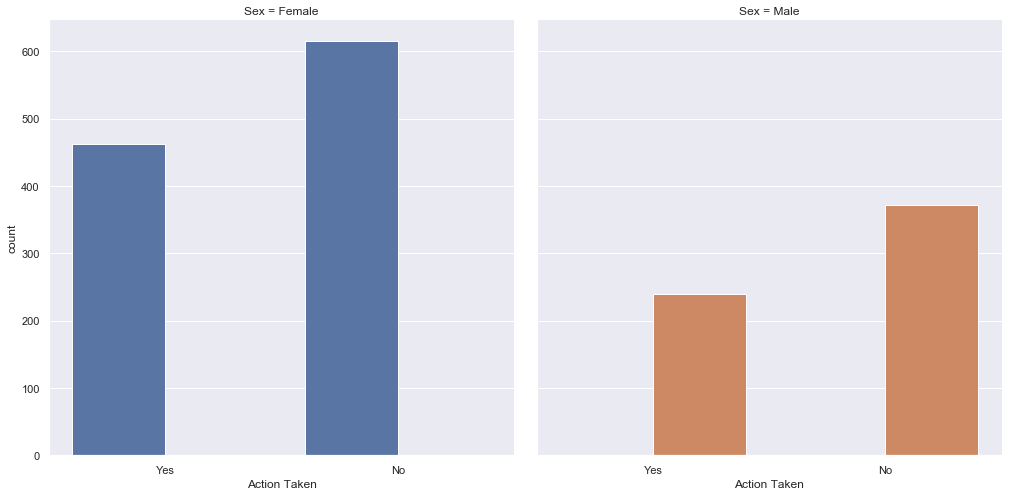

In [21]:
v = sns.catplot(x="Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Action Taken by Sex, Combined")
g = sns.catplot(x="Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

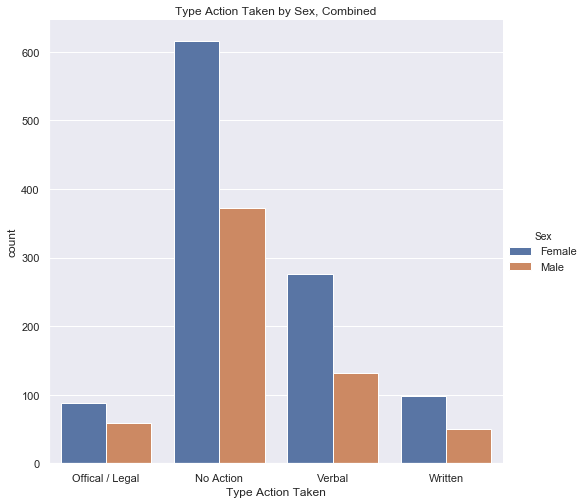

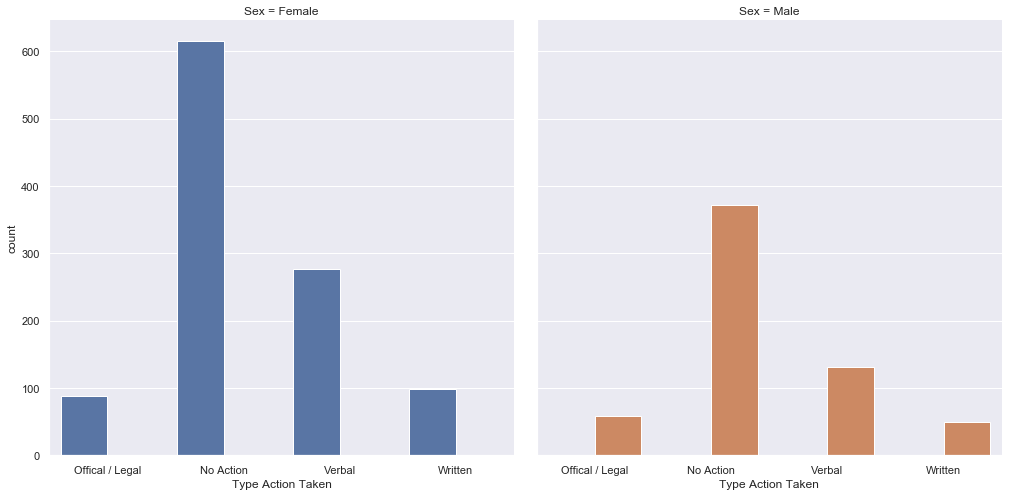

In [19]:
v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df.yes, kind="count",
                height=7, aspect=1);

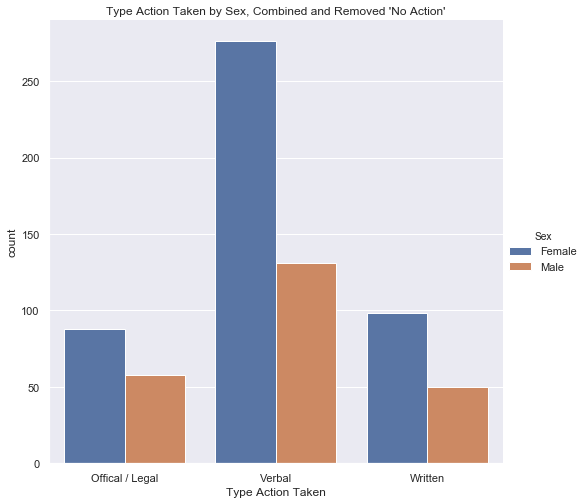

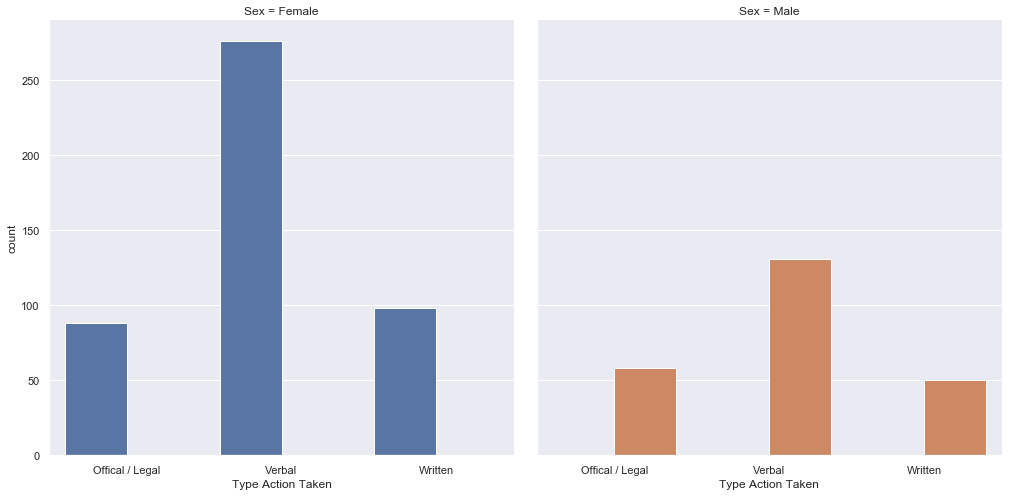

In [24]:
df_act_yes =  df['Action Taken']=='Yes'
df_yes_act = df[df_act_yes]

v = sns.catplot(x="Type Action Taken", hue="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);
v.set(title="Type Action Taken by Sex, Combined and Removed 'No Action'")
g = sns.catplot(x="Type Action Taken", hue="Sex", col="Sex",
                data=df_yes_act, kind="count",
                height=7, aspect=1);